<a href="https://colab.research.google.com/github/atharva2-0x/PowerBI_Ecomerse/blob/main/BIG4updated11-10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Feature Engineering**

This section focuses on creating new features or modifying existing ones to improve the performance of our machine learning model.
We will explore techniques such as:

Creating interaction terms: Combining existing features to capture
interactions between them.

Feature scaling: Transforming features to have similar ranges, which
can improve model performance.

Encoding categorical variables: Converting categorical data into numerical
representations.

Handling missing data: Imputing missing values to ensure that the model
can work with all the data.

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [35]:
data = np.genfromtxt('tranxData.csv', delimiter=',', dtype=str)

In [36]:
df = pd.DataFrame(data[1:], columns=data[0])

In [37]:
df


,Date,Day,Time,TransactionID,CustomerID,Item,Category,Amount,PaymentMethod
0,1/1/2024,Monday,9:15,TXN10001,CUST001,Latte,Beverage,5,Credit Card
1,1/1/2024,Monday,9:30,TXN10002,CUST002,Americano,Beverage,4.5,Mobile Payment
2,1/1/2024,Monday,9:45,TXN10003,CUST003,Turkey Sandwich,Food,7,Credit Card
3,1/1/2024,Monday,10:00,TXN10004,CUST004,Blueberry Muffin,Pastry,3,Cash
4,1/1/2024,Monday,12:15,TXN10005,CUST005,Espresso,Beverage,3,Credit Card
...,...,...,...,...,...,...,...,...,...
244,1/7/2024,Sunday,15:00,TXN10257,CUST032,Blueberry Muffin,Pastry,3,Credit Card
245,1/7/2024,Sunday,15:10,TXN10258,CUST033,Iced Tea,Beverage,3.5,Mobile Payment
246,1/7/2024,Sunday,19:20,TXN10269,CUST008,Latte,Beverage,5,Mobile Payment
247,1/7/2024,Sunday,15:30,TXN10260,CUST035,Latte,Beverage,5,Cash


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           249 non-null    object
 1   Day            249 non-null    object
 2   Time           249 non-null    object
 3   TransactionID  249 non-null    object
 4   CustomerID     249 non-null    object
 5   Item           249 non-null    object
 6   Category       249 non-null    object
 7   Amount         249 non-null    object
 8   PaymentMethod  249 non-null    object
dtypes: object(9)
memory usage: 17.6+ KB


In [41]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
244,False
245,False
246,False
247,False


# **Exploratory Data Analysis**

Exploratory Data Analysis is a crucial step to analyse any data. It involves understanding the data's characteristics, identifying patterns, and formulating hypotheses about the relationships between variables. This process helps us gain insights into the data and guide our feature engineering and modeling efforts.

Data Inspection:examined the structure of the DataFrame, using `df.info()` to understand the data types and identify potential missing values.

Data Cleaning: Address any missing values or inconsistencies found during inspection.

Duplicate Check: checked for duplicate rows using `df.duplicated()` to determine if there are redundant entries in the dataset, which might skew our analysis.

Descriptive Statistics: calculated and analysed summary statistics like mean, median, standard deviation, and quartiles for numerical features to get a sense of their central tendency and variability.

Visualization:  used matplotlib to create histograms, scatter plots, box plots, and other visualizations to understand the distribution of variables and the relationships between them.


# **Analysis of crowd Rush over different days with specific Time slots**

In [42]:
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M')
time_slots = ["9am-1pm", "1pm-5pm", "5pm-9pm"]

In [43]:
transaction_counts = {day: [0, 0, 0] for day in df['Day'].unique()}


In [44]:

for day in df['Day'].unique():
    df_day = df[df['Day'] == day]
    for i, time_slot in enumerate(time_slots):
        start_time = pd.to_datetime(time_slot.split('-')[0], format='%I%p').time()
        end_time = pd.to_datetime(time_slot.split('-')[1], format='%I%p').time()
        transaction_counts[day][i] = df_day.loc[(df_day['Time'].dt.time >= start_time) & (df_day['Time'].dt.time < end_time)].shape[0]


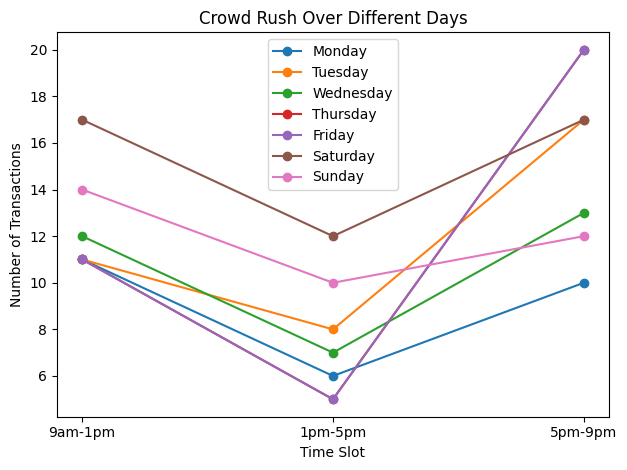

In [45]:

for day in transaction_counts.keys():
    plt.plot(time_slots, transaction_counts[day], marker='o', label=day)

plt.xlabel('Time Slot')
plt.ylabel('Number of Transactions')
plt.title('Crowd Rush Over Different Days')
plt.legend()
plt.tight_layout()

plt.show()


# **Weekend Vs Weekdays Crowd Rush**

In [46]:
df['TypeOfDay'] = df['Day'].apply(lambda x: 'Weekday' if x in ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'] else 'Weekend')


transaction_counts_weekday = {slot: 0 for slot in time_slots}
transaction_counts_weekend = {slot: 0 for slot in time_slots}

weekday_count = df[df['TypeOfDay'] == 'Weekday']['Day'].nunique()
weekend_count = df[df['TypeOfDay'] == 'Weekend']['Day'].nunique()

In [47]:
for time_slot in time_slots:
    start_time = pd.to_datetime(time_slot.split('-')[0], format='%I%p').time()
    end_time = pd.to_datetime(time_slot.split('-')[1], format='%I%p').time()

    weekday_transactions = df.loc[(df['TypeOfDay'] == 'Weekday') &
                                  (df['Time'].dt.time >= start_time) &
                                  (df['Time'].dt.time < end_time)].shape[0]
    weekend_transactions = df.loc[(df['TypeOfDay'] == 'Weekend') &
                                  (df['Time'].dt.time >= start_time) &
                                  (df['Time'].dt.time < end_time)].shape[0]

    transaction_counts_weekday[time_slot] = weekday_transactions / weekday_count
    transaction_counts_weekend[time_slot] = weekend_transactions / weekend_count

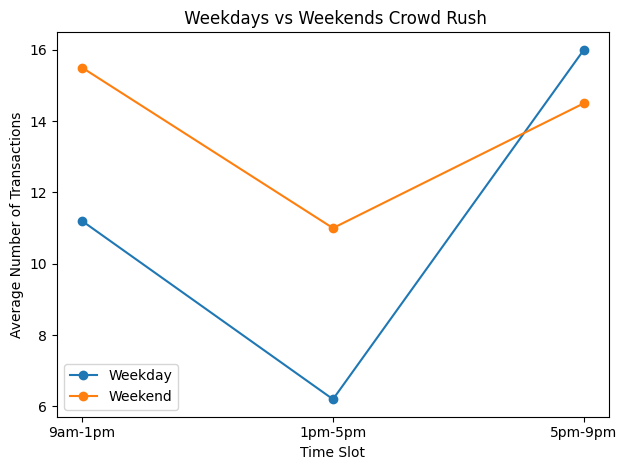

In [76]:

plt.plot(time_slots, list(transaction_counts_weekday.values()), marker='o', label='Weekday')
plt.plot(time_slots, list(transaction_counts_weekend.values()), marker='o', label='Weekend')

plt.xlabel('Time Slot')
plt.ylabel('Average Number of Transactions')
plt.title(' Weekdays vs Weekends Crowd Rush')
plt.legend()
plt.tight_layout()

plt.show()

# **Customer Footfall per day**

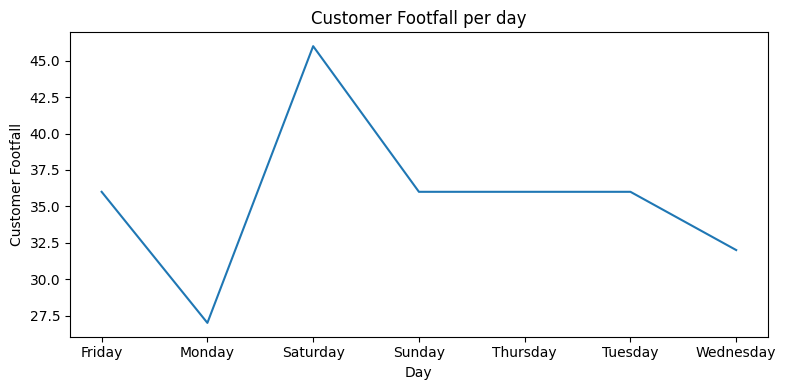

In [57]:

transaction_counts_by_day = df.groupby('Day')['Time'].count()

plt.figure(figsize=(8, 4))
plt.plot(transaction_counts_by_day.index, transaction_counts_by_day.values)
plt.xlabel('Day')
plt.ylabel('Customer Footfall')
plt.title('Customer Footfall per day')
plt.tight_layout()
plt.show()


# **Sale of Food Items based on category**

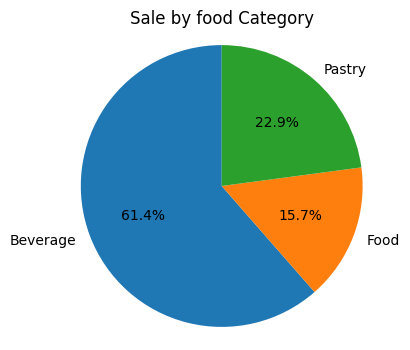

In [79]:
item_counts = df.groupby('Category')['Time'].count()

plt.figure(figsize=(4,4))
plt.pie(item_counts, labels=item_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Sale by food Category')
plt.axis('equal')
plt.show()

# **Overall Revenue Generation by Category**

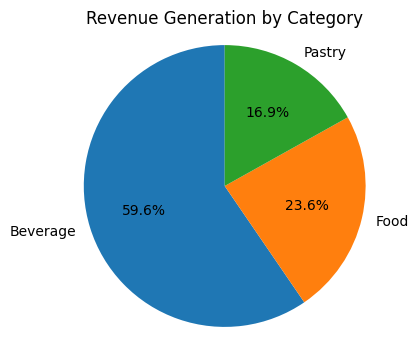

In [72]:

revenue_by_category = df.groupby('Category')['Amount'].sum()

plt.figure(figsize=(4, 4))
plt.pie(revenue_by_category, labels=revenue_by_category.index, autopct='%1.1f%%', startangle=90)
plt.title('Revenue Generation by Category')
plt.axis('equal')
plt.show()

# **Revenue Generated by Each Category**

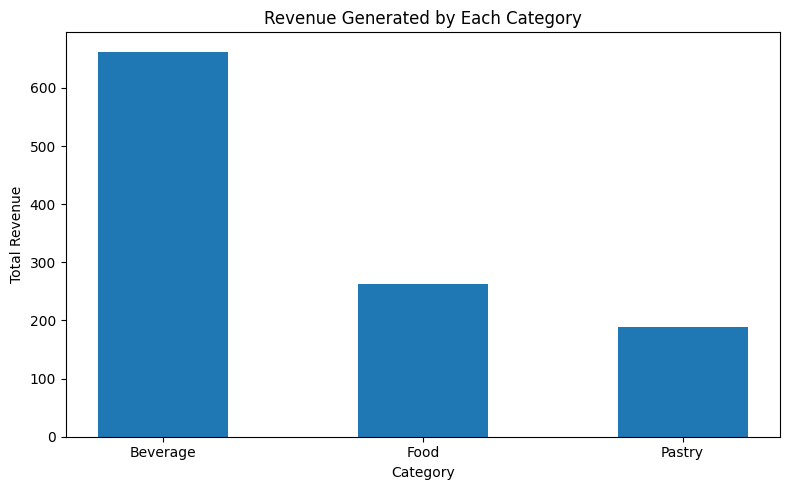

In [61]:
df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce')

revenue_by_category = df.groupby('Category')['Amount'].sum()

plt.figure(figsize=(8, 5))
plt.bar(revenue_by_category.index, revenue_by_category.values, width = 0.5)
plt.xlabel('Category')
plt.ylabel('Total Revenue')
plt.title('Revenue Generated by Each Category')
plt.tight_layout()
plt.show()


# **Most revenue generating items**

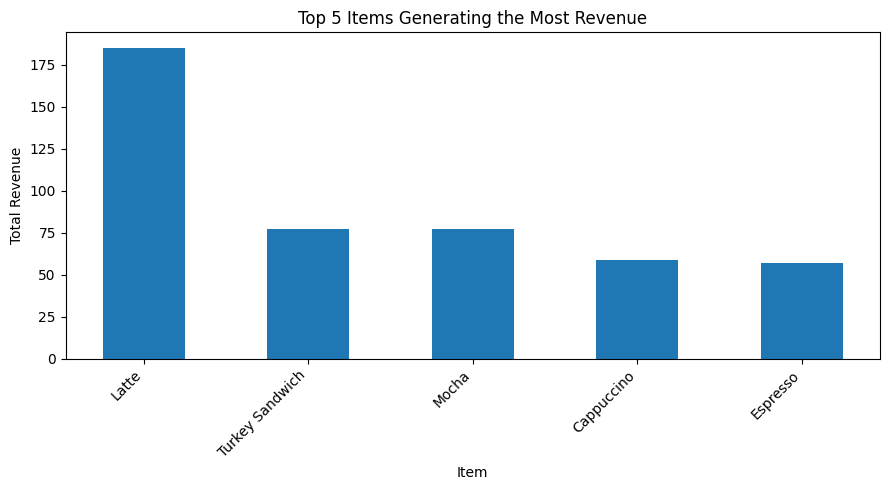

In [81]:
df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce')

revenue_by_item = df.groupby('Item')['Amount'].sum().sort_values(ascending=False).head(5)

plt.figure(figsize=(9, 5))
plt.bar(revenue_by_item.index, revenue_by_item.values, width = 0.5)
plt.xlabel('Item')
plt.ylabel('Total Revenue')
plt.title('Top 5 Items Generating the Most Revenue')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# **Most Popular Items**

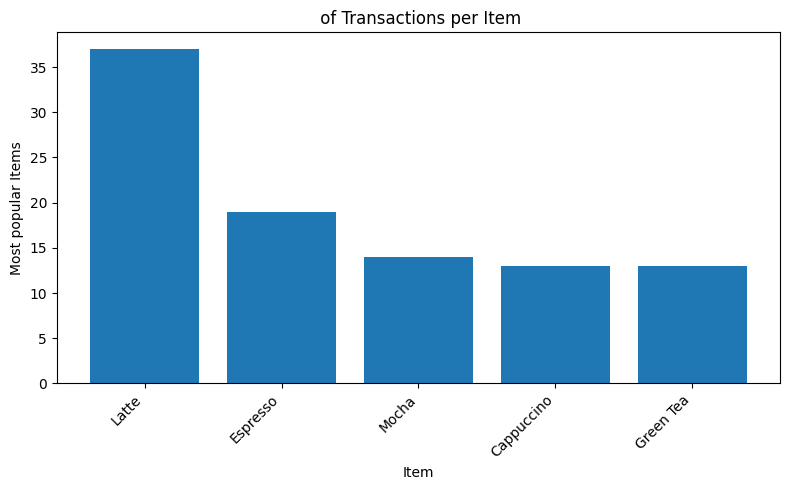

In [80]:
transaction_counts_by_item = df.groupby('Item')['Time'].count().sort_values(ascending=False).head(5)

plt.figure(figsize=(8, 5))
plt.bar(transaction_counts_by_item.index, transaction_counts_by_item.values)
plt.xlabel('Item')
plt.ylabel('Most popular Items')
plt.title(' of Transactions per Item')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# **Freuenet customers**

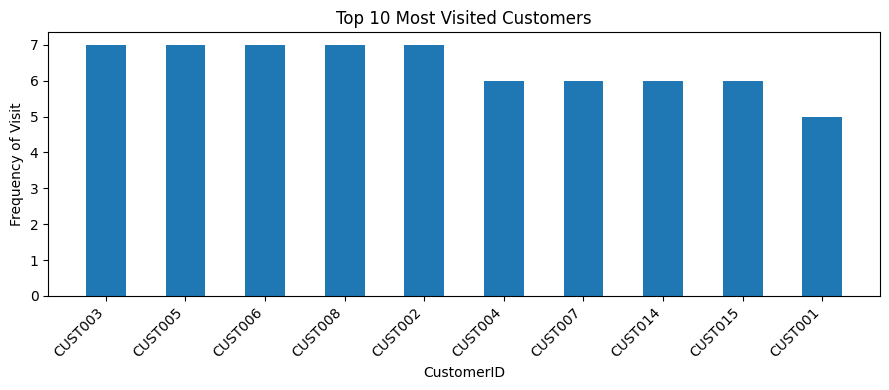

In [75]:
customer_visit_counts = df['CustomerID'].value_counts()

top_10_customers = customer_visit_counts.head(10)

plt.figure(figsize=(9, 4))
plt.bar(top_10_customers.index, top_10_customers.values, width = 0.5)
plt.xlabel('CustomerID')
plt.ylabel('Frequency of Visit')
plt.title('Top 10 Most Visited Customers')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# **Feature Engineering**
created a new csv file to analyse and per campaign and post campaign sale

In [29]:
daily_revenue = df.groupby('Day')['Amount'].sum()

daily_revenue_df = pd.DataFrame({'Day': daily_revenue.index, 'PostCampRevenue': daily_revenue.values})

daily_revenue_df.to_csv('daily_revenue.csv', index=False)

print("Daily revenue data saved to 'daily_revenue.csv'")

Daily revenue data saved to 'daily_revenue.csv'
